<a href="https://colab.research.google.com/github/Jindapornphopomee/BSC_DPDM23/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classification**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Preparation

In [2]:
import pandas as pd
import numpy as np

## Metadata

Number of Instances: 690

Number of Attributes: 15 + class attribute

Attribute Information:

    A1:	b, a.
    A2:	continuous.
    A3:	continuous.
    A4:	u, y, l, t.
    A5:	g, p, gg.
    A6:	c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
    A7:	v, h, bb, j, n, z, dd, ff, o.
    A8:	continuous.
    A9:	t, f.
    A10:	t, f.
    A11:	continuous.
    A12:	t, f.
    A13:	g, p, s.
    A14:	continuous.
    A15:	continuous.
    A16: +,-         (class attribute)

Missing Attribute Values:
    37 cases (5%) have one or more missing values.  The missing
    values from particular attributes are:

    A1:  12
    A2:  12
    A4:   6
    A5:   6
    A6:   9
    A7:   9
    A14: 13

Class Distribution
  
    +: 307 (44.5%)
    -: 383 (55.5%)


In [3]:
col_name = ['a1','a2','a3','a4','a5','a6','a7','a8',
            'a9','a10','a11','a12','a13','a14','a15','a16']

In [4]:
credit = pd.read_csv('/content/drive/MyDrive/bsc_dpdm23_data/crx.data', header = None, names=col_name) # (1) Set header = None because there is no column names in the data file

print(credit.shape)
credit.head()

(690, 16)


,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [5]:
credit = credit[['a3','a8','a9','a10','a11','a12','a13','a15','a16']]

In [6]:
credit.isnull().any()

a3     False
a8     False
a9     False
a10    False
a11    False
a12    False
a13    False
a15    False
a16    False
dtype: bool

Preprocessing

In [7]:
credit = credit.replace({'t':1,'f':0,'g':1, 'p':2, 's':3,'+':1,'-':0})

## Try simple ML

In [8]:
import numpy as np

In [9]:
np.random.seed(seed=1)

In [10]:
a = np.random.randint(2, size=len(credit))

In [11]:
a

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,

In [12]:
train = credit[a == 1]
train.shape

(324, 9)

In [13]:
test = credit[a == 0]
test.shape

(366, 9)

## Start Decision Tree

### import

In [14]:
from sklearn.tree import DecisionTreeClassifier

### define

In [15]:
Dtree1 = DecisionTreeClassifier(random_state=0)

### train

In [16]:
X_train = train.iloc[:,:-1]

In [17]:
y_train = train.iloc[:,-1]

In [18]:
Dtree1.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [19]:
from sklearn import tree

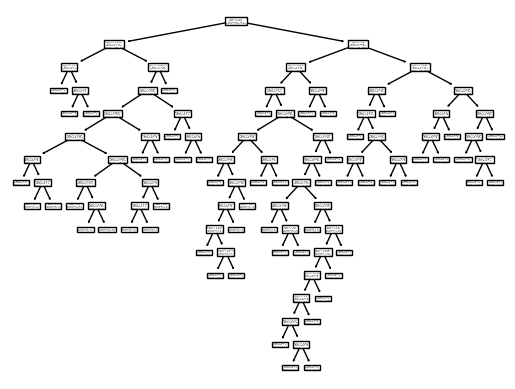

In [20]:
tree.plot_tree(Dtree1);

### test

In [21]:
X_test = test.iloc[:,:-1]
y_test = test.iloc[:,-1]

In [22]:
y_predict = Dtree1.predict(X_test)

In [23]:
 from sklearn.metrics import accuracy_score

In [24]:
accuracy_score(y_test, y_predict)

0.825136612021858

## Set parameter

### Import

In [25]:
from sklearn.tree import DecisionTreeClassifier

### Define

In [26]:
Dtree2 = DecisionTreeClassifier(random_state=0,max_depth=4) #-ขั้นตอนที่สำคัญว่าต้นไม้มีกี่ชั้น

### Train

In [27]:
Dtree2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

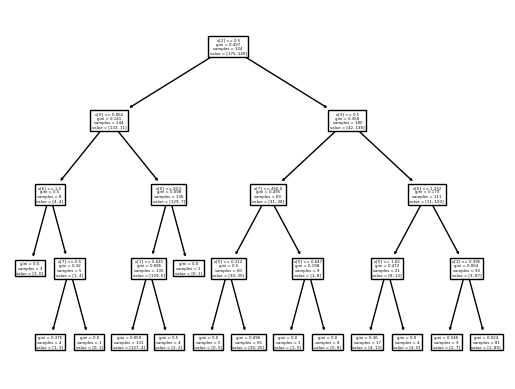

In [28]:
tree.plot_tree(Dtree2);

### Test

In [29]:
y_predict2 = Dtree2.predict(X_test)

In [30]:
accuracy_score(y_test, y_predict2)

0.8579234972677595

# HW3

ให้แต่ละกลุ่ม สร้างต้นไม้ของตัวเอง โดยปรับเปลี่ยน parameters ให้ และ มาอธิบาย parameter ของตัวเอง ว่ามันคืออะไร

- แถว 1 criterion, max_leaf_nodes
- แถว 2 splitter, min_samples_split
- แถว 3 min_samples_leaf, max_features
- แถว 4 min_impurity_decrease
- แถว 5 min_weight_fraction_leaf

##แถว 5 min_weight_fraction_leaf

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree


##tain & test

In [32]:
X_train = train.iloc[:,:-1]
y_train = train.iloc[:,-1]
X_test = test.iloc[:,:-1]
y_test = test.iloc[:,-1]

##กำหนด min_weight_fraction_leaf ในการ Train



* ปรับค่า min_weight_fraction_leaf ต่ำที่สุด หรือ ใกล้เคียง 0




In [33]:
Dtree3 = DecisionTreeClassifier(random_state=0, min_weight_fraction_leaf=0.001)



*  ปรับค่า min_weight_fraction_leaf สูงที่สุด หรือ ใกล้เคียง 0.5


In [34]:
Dtree4 = DecisionTreeClassifier(random_state=0, min_weight_fraction_leaf=0.499)

##DecisionTreeClassifier



*   Min

In [35]:
Dtree3.fit(X_train, y_train)

DecisionTreeClassifier(min_weight_fraction_leaf=0.001, random_state=0)




*  Max

In [36]:
Dtree4.fit(X_train, y_train)

DecisionTreeClassifier(min_weight_fraction_leaf=0.499, random_state=0)

##Visualize the tree



*   Min tree plot


In [37]:
import matplotlib.pyplot as plt

[Text(0.45516304347826086, 0.96875, 'x[2] <= 0.5\ngini = 0.497\nsamples = 324\nvalue = [175, 149]'),
 Text(0.20923913043478262, 0.90625, 'x[0] <= 0.062\ngini = 0.141\nsamples = 144\nvalue = [133, 11]'),
 Text(0.11956521739130435, 0.84375, 'x[6] <= 1.5\ngini = 0.5\nsamples = 8\nvalue = [4, 4]'),
 Text(0.09782608695652174, 0.78125, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.14130434782608695, 0.78125, 'x[7] <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.11956521739130435, 0.71875, 'gini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.16304347826086957, 0.71875, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.29891304347826086, 0.84375, 'x[7] <= 52600.0\ngini = 0.098\nsamples = 136\nvalue = [129, 7]'),
 Text(0.27717391304347827, 0.78125, 'x[1] <= 5.625\ngini = 0.085\nsamples = 135\nvalue = [129, 6]'),
 Text(0.20652173913043478, 0.71875, 'x[7] <= 2350.0\ngini = 0.059\nsamples = 131\nvalue = [127, 4]'),
 Text(0.13043478260869565, 0.65625, 'x[0] <= 0.168\ngini = 0.0

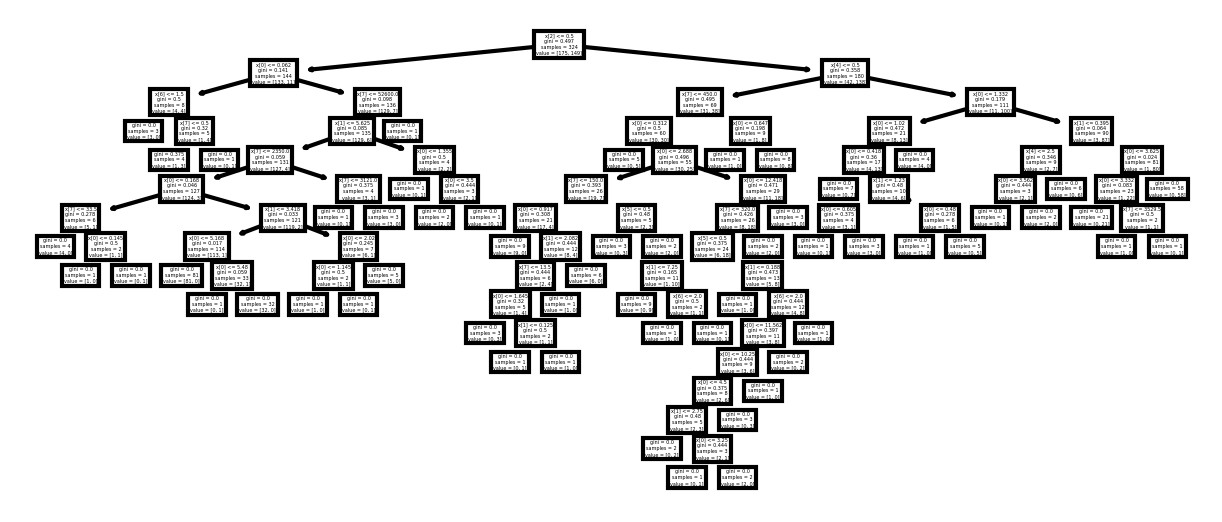

In [38]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (5,2), dpi=300)
tree.plot_tree(Dtree3, ax=axes)



*   Max tree plot



[Text(0.5, 0.5, 'gini = 0.497\nsamples = 324\nvalue = [175, 149]')]

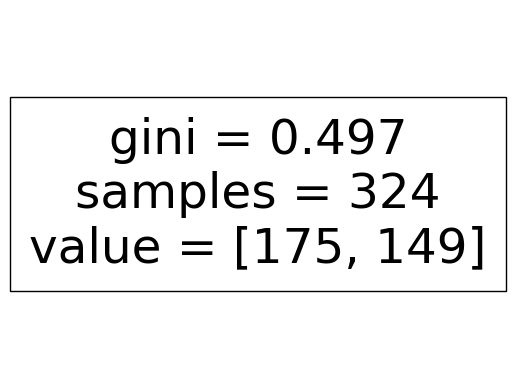

In [39]:
tree.plot_tree(Dtree4)

##Make predictions

In [40]:
y_predict3 = Dtree3.predict(X_test)

In [41]:
y_predict4 = Dtree4.predict(X_test)

##Calculate accuracy



*   Lowest min_weight_fraction_leaf
อธิบาย:
*  โครงสร้างต้นไม้: มีการแตกกิ่งมาก, อาจมีความลึก
*   ความเสี่ยงของการ Overfitting: สูง เพราะโมเดลอาจซับซ้อนเกินไป จับเอาสัญญาณรบกวนในข้อมูลการฝึกฝนเป็นลวดลายที่มีความสำคัญ
*  ประสิทธิภาพของโมเดล: ความแม่นยำสูงบนข้อมูลการฝึก แต่อาจมีประสิทธิภาพที่ไม่ดีเมื่อทดสอบกับข้อมูลใหม่
*  การตีความ: ต่ำ เนื่องจากความซับซ้อนและขนาดของต้นไม้





In [42]:
accuracy = accuracy_score(y_test, y_predict3)
print(f"Accuracy: {accuracy}")

Accuracy: 0.825136612021858




*   Highest min_weight_fraction_leaf
อธิบาย:

*   โครงสร้างต้นไม้: ง่ายมาก อาจมีเพียงโหนดรากหรือโหนดที่ตื้นๆ ไม่กี่โหนด
*  ความเสี่ยงของการ Underfitting: สูง เพราะโมเดลอาจง่ายเกินไป ไม่สามารถจับลักษณะสำคัญของข้อมูลได้
*   ประสิทธิภาพของโมเดล:ความแม่นยำต่ำบนข้อมูลการฝึกสะท้อนถึงความ ไม่สามารถของโมเดลในการฟิตข้อมูลได้ดี
*   การตีความ: สูง เนื่องจากต้นไม้นั้นง่ายและเข้าใจได้ง่าย








In [43]:
accuracy = accuracy_score(y_test, y_predict4)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5683060109289617


## madell selection
เลือกโมเดลที่ดีที่สุดโดยเลือกจากต้นไม้ที่มี Parameter
depth, criteriov และ Naive Bayes
และรายงานผลการคาดการณ์สำหรับนำไปทำนายในอนาคต

In [45]:
credit

,a3,a8,a9,a10,a11,a12,a13,a15,a16
0,0.000,1.25,1,1,1,0,1,0,1
1,4.460,3.04,1,1,6,0,1,560,1
2,0.500,1.50,1,0,0,0,1,824,1
3,1.540,3.75,1,1,5,1,1,3,1
4,5.625,1.71,1,0,0,0,3,0,1
...,...,...,...,...,...,...,...,...,...
685,10.085,1.25,0,0,0,0,1,0,0
686,0.750,2.00,0,1,2,1,1,394,0
687,13.500,2.00,0,1,1,1,1,1,0
688,0.205,0.04,0,0,0,0,1,750,0


In [46]:
from sklearn.model_selection import train_test_split

In [47]:
x_credit = credit.iloc[:,:-1]
y_credit = credit.iloc[:,-1]


In [48]:
x_train, x_test, y_train, y_test = train_test_split(x_credit, y_credit, test_size=0.33, random_state=6)

### split data into 3 folds

In [49]:
from sklearn.model_selection import KFold

In [50]:
kf = KFold(n_splits=3,shuffle=True, random_state=6)

In [55]:
for i, (train_index, test_index) in enumerate(kf.split(X_train)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

Fold 0:
  Train: index=[  1   2   3   5   7   9  11  12  14  15  16  18  20  22  23  24  25  26
  28  29  31  33  34  35  36  37  38  39  40  41  42  43  45  46  47  48
  49  50  51  55  57  58  60  62  63  64  66  68  70  71  72  73  75  76
  77  79  80  82  85  86  87  88  89  91  92  94  95  96  97  99 100 101
 102 104 106 107 108 110 111 112 113 114 119 120 121 123 124 125 126 127
 128 129 130 132 133 137 138 142 144 145 147 148 149 150 151 152 153 155
 156 157 159 160 161 164 167 168 169 170 171 172 174 176 178 182 184 185
 186 187 191 192 193 194 196 197 198 199 200 201 202 204 205 206 207 208
 209 210 211 212 213 215 216 218 219 220 223 226 227 228 229 232 233 234
 236 237 242 244 245 246 247 248 250 251 254 259 260 264 265 266 269 270
 271 273 274 275 276 277 278 280 281 282 284 286 288 289 290 293 295 296
 301 302 304 305 307 309 310 312 313 314 315 316 317 318 319 320 322 323]
  Test:  index=[  0   4   6   8  10  13  17  19  21  27  30  32  44  52  53  54  56  59
  61  65  67

In [56]:
from sklearn.naive_bayes import GaussianNB

###train 4 decision tree models and1 Naive Bayes

In [57]:
results = []
for i, (train_index, test_index) in enumerate(kf.split(X_train)):
    result_f = {}
    #DT depth 3, cri gini
    Dtree1 = DecisionTreeClassifier(random_state=6,max_depth=3,criterion='gini') #define
    Dtree1.fit(np.array(X_train)[train_index],np.array(y_train)[train_index])   #train
    prediction1 = Dtree1.predict(np.array(X_train)[test_index]) #predict
    acc1 = accuracy_score(np.array(y_train)[test_index], prediction1) #evaluate
    result_f['dt1'] = acc1

    #DT depth 5, cri gini
    Dtree2 = DecisionTreeClassifier(random_state=6,max_depth=5,criterion='gini')
    Dtree2.fit(np.array(X_train)[train_index],np.array(y_train)[train_index])   #train
    prediction2 = Dtree2.predict(np.array(X_train)[test_index]) #predict
    acc2 = accuracy_score(np.array(y_train)[test_index], prediction2) #evaluate
    result_f['dt2'] = acc2

    #DT depth 3, cri gain
    Dtree3 = DecisionTreeClassifier(random_state=6,max_depth=3,criterion='entropy')
    Dtree3.fit(np.array(X_train)[train_index],np.array(y_train)[train_index])   #train
    prediction3 = Dtree3.predict(np.array(X_train)[test_index]) #predict
    acc3 = accuracy_score(np.array(y_train)[test_index], prediction3) #evaluate
    result_f['dt3'] = acc3

    #DT depth 5, cri gain
    Dtree4 = DecisionTreeClassifier(random_state=6,max_depth=5,criterion='entropy')
    Dtree4.fit(np.array(X_train)[train_index],np.array(y_train)[train_index])   #train
    prediction4 = Dtree4.predict(np.array(X_train)[test_index]) #predict
    acc4 = accuracy_score(np.array(y_train)[test_index], prediction4) #evaluate
    result_f['dt4'] = acc4

    #Naïve Bayes
    gnb = GaussianNB()
    gnb.fit(np.array(X_train)[train_index],np.array(y_train)[train_index])   #train
    predictionN = gnb.predict(np.array(X_train)[test_index]) #predict
    accN = accuracy_score(np.array(y_train)[test_index], predictionN) #evaluate
    result_f['NB'] = accN

    results.append(result_f)

In [58]:
results

[{'dt1': 0.46296296296296297,
  'dt2': 0.49074074074074076,
  'dt3': 0.4722222222222222,
  'dt4': 0.4351851851851852,
  'NB': 0.5277777777777778},
 {'dt1': 0.5277777777777778,
  'dt2': 0.5370370370370371,
  'dt3': 0.5277777777777778,
  'dt4': 0.5370370370370371,
  'NB': 0.4166666666666667},
 {'dt1': 0.6574074074074074,
  'dt2': 0.5648148148148148,
  'dt3': 0.6388888888888888,
  'dt4': 0.6388888888888888,
  'NB': 0.3611111111111111}]

##find the best model from 3-fold cross validation

In [59]:
print(f"averaged acc DT1 = {(results[0]['dt1']+results[1]['dt1']+results[2]['dt1'])/3}")
print(f"averaged acc DT2 = {(results[0]['dt2']+results[1]['dt2']+results[2]['dt2'])/3}")
print(f"averaged acc DT3 = {(results[0]['dt3']+results[1]['dt3']+results[2]['dt3'])/3}")
print(f"averaged acc DT4 = {(results[0]['dt4']+results[1]['dt4']+results[2]['dt4'])/3}")
print(f"averaged acc NB = {(results[0]['NB']+results[1]['NB']+results[2]['NB'])/3}")

averaged acc DT1 = 0.5493827160493827
averaged acc DT2 = 0.5308641975308642
averaged acc DT3 = 0.5462962962962963
averaged acc DT4 = 0.5370370370370371
averaged acc NB = 0.4351851851851852


##evaluate on test

In [61]:
gnb = GaussianNB() #define
gnb.fit(np.array(X_train),np.array(y_train))   #train
prediction_test = gnb.predict(np.array(X_test)) #predict
accTest = accuracy_score(np.array(y_test), prediction_test) #evaluate

print(f'model Naïve Bayes จะมี Accuracy เมื่อไปใช้งานจริงประมาณ {accTest}')

ValueError: Found input variables with inconsistent numbers of samples: [324, 462]